In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [151]:
df=pd.read_csv(r"C:\Users\User\Desktop\AI\survey lung cancer.csv")

In [152]:
print (df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [153]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [154]:
df.shape

(309, 16)

In [155]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [157]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [158]:
df.duplicated().sum()

33

In [159]:
df.drop_duplicates(inplace=True)

In [160]:
le=LabelEncoder()

In [161]:
df["GENDER"]=le.fit_transform(df["GENDER"])
df["AGE"]=le.fit_transform(df["AGE"])
df["SMOKING"]=le.fit_transform(df["SMOKING"])
df["YELLOW_FINGERS"]=le.fit_transform(df["YELLOW_FINGERS"])
df["SMOKING"]=le.fit_transform(df["SMOKING"])
df["ANXIETY"]=le.fit_transform(df["ANXIETY"])
df["CHRONIC DISEASE"]=le.fit_transform(df["CHRONIC DISEASE"])
df["ALCOHOL CONSUMING"]=le.fit_transform(df["ALCOHOL CONSUMING"])
df["LUNG_CANCER"]=le.fit_transform(df["LUNG_CANCER"])

In [162]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,1,0,2,1,2,1,2,2,2,2,1
1,1,31,1,0,0,1,1,2,2,1,0,1,2,2,2,1
2,0,16,0,0,0,2,0,2,1,2,0,2,2,1,2,0
3,1,20,1,1,1,1,0,1,1,1,1,1,1,2,2,0
4,0,20,0,1,0,1,0,1,1,2,0,2,2,1,1,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

In [164]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,1,0,2,1,2,1,2,2,2,2,1
1,1,31,1,0,0,1,1,2,2,1,0,1,2,2,2,1
2,0,16,0,0,0,2,0,2,1,2,0,2,2,1,2,0
3,1,20,1,1,1,1,0,1,1,1,1,1,1,2,2,0
4,0,20,0,1,0,1,0,1,1,2,0,2,2,1,1,0


<AxesSubplot:ylabel='GENDER'>

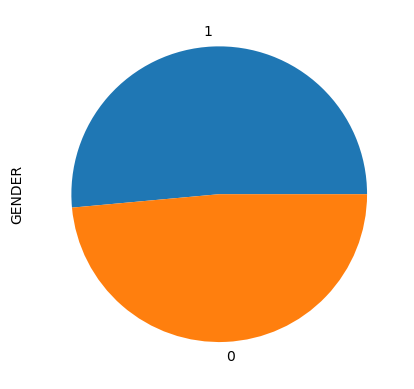

In [165]:
df['GENDER'].value_counts().plot(kind="pie")

In [166]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,20.050725,0.543478,0.576087,0.496377,1.507246,0.521739,1.663043,1.547101,1.547101,0.550725,1.576087,1.630435,1.467391,1.557971,0.862319
std,0.500698,7.792605,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,14.750000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,19.500000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,26.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,38.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


<AxesSubplot:>

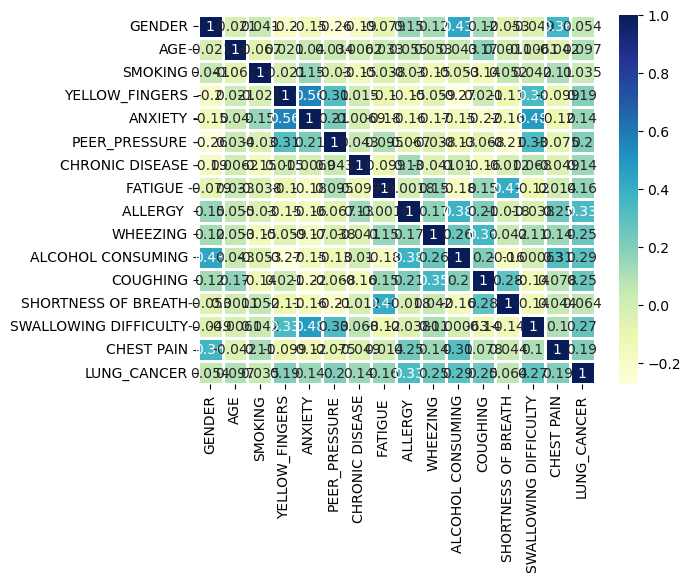

In [167]:
corrmat=df.corr()
sns.heatmap(corrmat,cmap="YlGnBu",linewidth=0.8,annot=True)

In [168]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [245]:
X_over, y_over = oversample.fit_resample(X, y)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.8, random_state= 40)

In [246]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (95, 15)
y_train: (95,)
X_test: (381, 15)
y_test: (381,)


In [254]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7742782152230971


In [255]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

In [256]:
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.7427821522309711
ROC AUC Score: 0.8214010141093474


In [257]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf)*100,"%")

Accuracy: 88.18897637795276 %


In [258]:
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  97.04710144927537
[1.         0.95833333 0.95833333 0.95833333 1.         0.95833333
 1.         0.95833333 0.95833333 0.95833333 1.         1.
 0.91666667 1.         1.         0.95833333 1.         0.95652174
 0.86956522 1.        ]


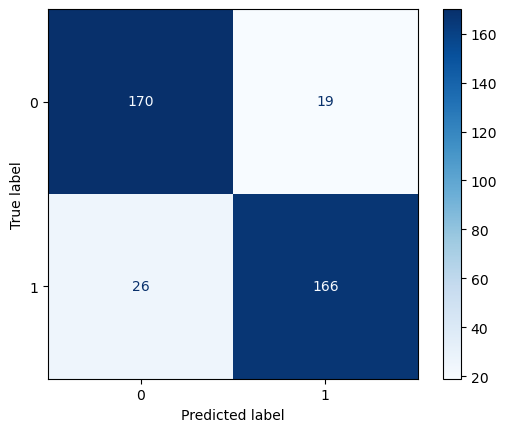

In [259]:
plot_confusion_matrix(rf_clf,X_test,y_test,cmap="Blues")

In [260]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.863517060367454


In [211]:
print (df)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   26        0               1        1              1   
1         1   31        1               0        0              1   
2         0   16        0               0        0              2   
3         1   20        1               1        1              1   
4         0   20        0               1        0              1   
..      ...  ...      ...             ...      ...            ...   
279       0   16        0               1        1              2   
280       0   16        1               0        0              1   
281       1   12        1               0        0              1   
282       1    4        0               1        1              1   
283       1   17        0               1        1              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         2         1         2                  1   
1                  1     

In [212]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,1,0,2,1,2,1,2,2,2,2,1
1,1,31,1,0,0,1,1,2,2,1,0,1,2,2,2,1
2,0,16,0,0,0,2,0,2,1,2,0,2,2,1,2,0
3,1,20,1,1,1,1,0,1,1,1,1,1,1,2,2,0
4,0,20,0,1,0,1,0,1,1,2,0,2,2,1,1,0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

In [214]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,20.050725,0.543478,0.576087,0.496377,1.507246,0.521739,1.663043,1.547101,1.547101,0.550725,1.576087,1.630435,1.467391,1.557971,0.862319
std,0.500698,7.792605,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,14.750000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,19.500000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,26.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,38.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


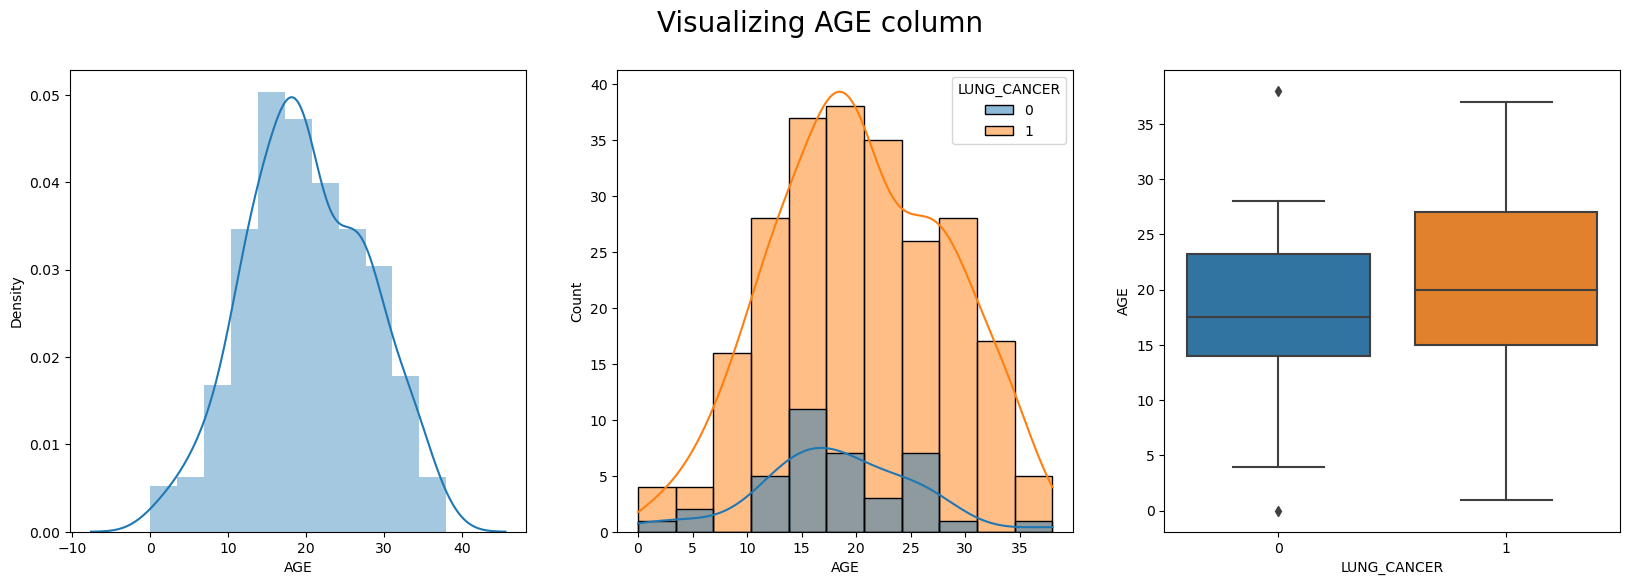

In [261]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

In [262]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,1,0,2,1,2,1,2,2,2,2,1
1,1,31,1,0,0,1,1,2,2,1,0,1,2,2,2,1
2,0,16,0,0,0,2,0,2,1,2,0,2,2,1,2,0
3,1,20,1,1,1,1,0,1,1,1,1,1,1,2,2,0
4,0,20,0,1,0,1,0,1,1,2,0,2,2,1,1,0
